In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#변수값 지정 by 난수 생성
X = 2 * np.random.rand(100, 1)   #랜덤한 균일분포 행렬 생성
y = 4 + 3 * X + np.random.randn(100, 1)  #랜덤한 표준편차 1의 가우시안 분포 난수를 생성, 행렬렬

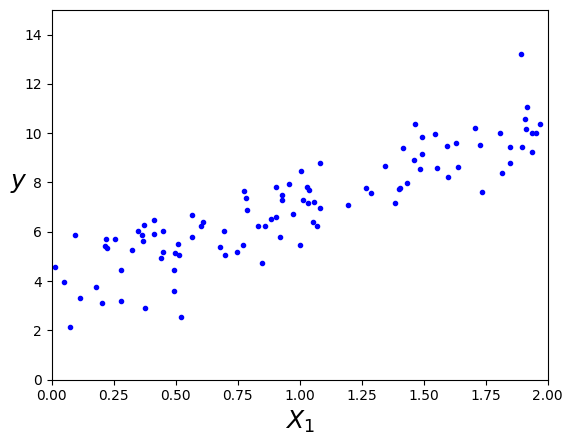

In [32]:
plt.plot(X , y, 'b.')
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15]) #plt.axis(x_min, x_max, y_min, y_max)
plt.show()

In [33]:
# 모든 샘플에 1을 붙여서 2차원 배열 생성성
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [34]:
theta_best

array([[3.76169542],
       [3.3069289 ]])

In [35]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

In [36]:
y_predict

array([[ 3.76169542],
       [10.37555323]])

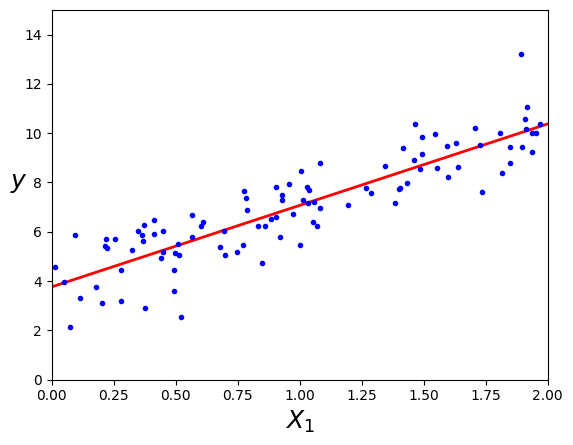

In [37]:
plt.plot(X_new, y_predict, "r-", linewidth = 2, label = "Predictions")
plt.plot(X , y, 'b.')
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

## 사이킷런 ##

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.76169542]), array([[3.3069289]]))

In [40]:
X_new = np.array([[0], [2]])

y_predict = lin_reg.predict(X_new)

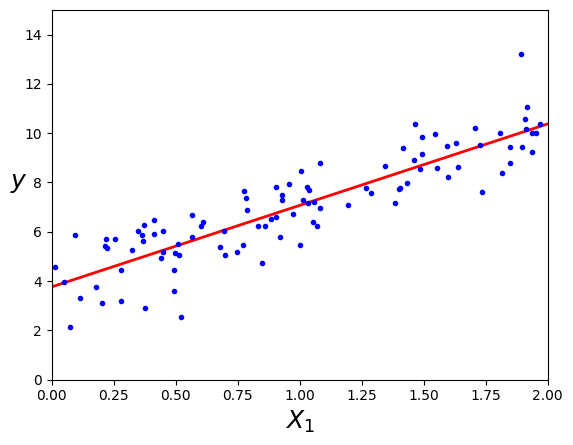

In [41]:
plt.plot(X_new, y_predict, "r-", linewidth = 2, label = "Predictions")
plt.plot(X , y, 'b.')
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

## 경사하강법 ##

In [43]:
eta = 0.1  #learning rate
n_iterations = 1000  #epoch
m = 100  #sample

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #경사하강법의 수식을 그대로 따라감
  theta = theta - eta * gradients

In [44]:
# 위에서 한 방법과 같은 결과를 보임
theta

array([[3.76169542],
       [3.3069289 ]])

In [45]:
#경사하강법의 step 그리기기
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
    plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

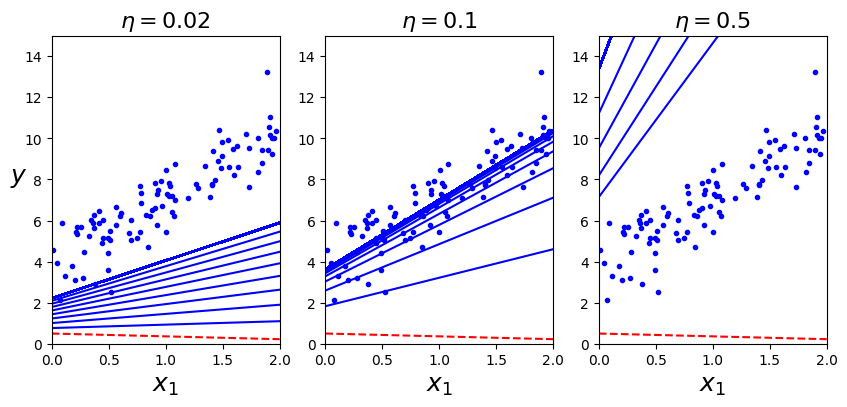

In [46]:
#배치 경사하강법법
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

In [47]:
#확률적 경사하강법
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [48]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)

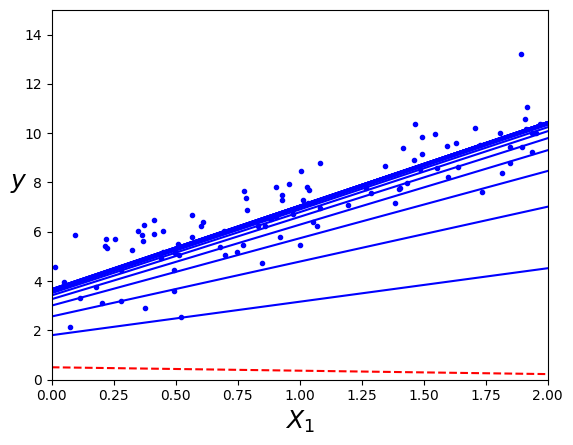

In [49]:
for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)

    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]

    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    eta = learning_schedule(epoch * m + 1)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])
plt.show()

In [50]:
theta

array([[3.76167315],
       [3.30694816]])

In [52]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol= 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel()) #ravel() == flatten()

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [53]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.76979017]), array([3.27668186]))

In [61]:
#미니배치 경사하강법
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000

def learning_schedule(t):
  return t0 / (t + t1)

In [62]:
t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]

  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i : i + minibatch_size]
    yi = y_shuffled[i : i + minibatch_size]

    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)  #shuffle된 데이터 셋으로 계산산
    eta = learning_schedule(epoch * m + 1)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)


In [63]:
theta

array([[3.76281217],
       [3.30801654]])

In [64]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

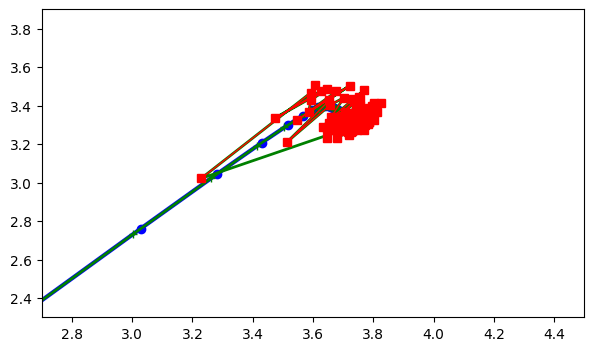

In [67]:
plt.figure(figsize = (7, 4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth = 3, label = "batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "g-+", linewidth = 2, label = "Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "r-s", linewidth = 1, label = "Minibatch")
plt.axis([2.7, 4.5, 2.3, 3.9])
plt.show()

## 다항 회귀 ##

In [68]:
np.random.seed(42)

In [69]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m ,1)

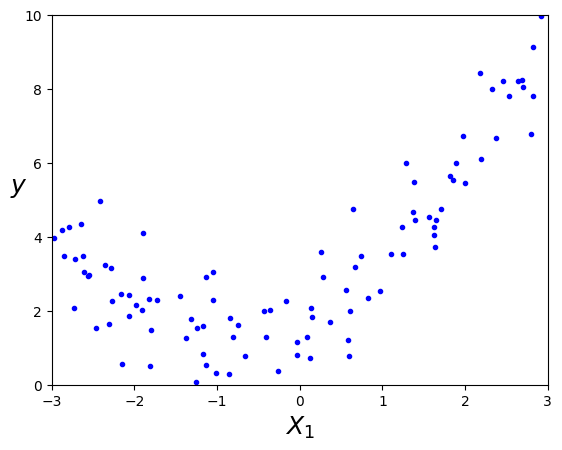

In [70]:
plt.plot(X, y, "b.")
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([-3, 3 , 0, 10])
plt.show()

In [71]:
from sklearn.preprocessing import PolynomialFeatures

ploy_features = PolynomialFeatures(degree = 2, include_bias= False) #module
X_poly = ploy_features.fit_transform(X)

In [72]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

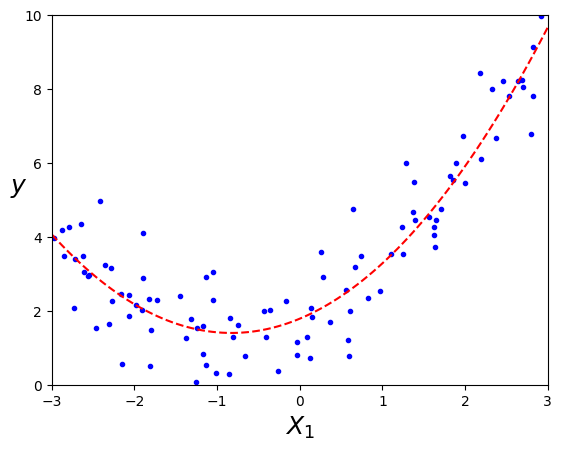

In [74]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # -3 ~ 3 사이의 구간을 100개로 나눔
X_new_poly = ploy_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r--")
plt.xlabel('$X_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.axis([-3, 3 , 0, 10])
plt.show()

## 릿지, 라쏘, 엘라스틱넷 ## 

In [75]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
np.random.seed(42)

In [76]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [79]:
# Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [80]:
# Lasso
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.55199076])

In [81]:
# ElasticNet
elastic_net = ElasticNet(alpha = 0.1 , l1_ratio = 0.5 , random_state = 42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])